In [1]:
import pandas as pd

import matplotlib as plt

import seaborn as sns

tn_budgets = pd.read_csv('Data/tn.movie_budgets.csv.gz')
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [2]:
df = tn_budgets

df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
#make release date column datetime in plans to show release date vs budget increase/decrease

df['release_date'] =  pd.to_datetime(df['release_date'], infer_datetime_format=True)


df_dates = df[(df['release_date'].dt.year >= 2013)]
df_dates

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
...,...,...,...,...,...,...
5756,57,2015-04-21,The Front Man,"$20,000",$0,$0
5761,62,2014-12-31,Stories of Our Lives,"$15,000",$0,$0
5771,72,2015-05-19,Family Motocross,"$10,000",$0,$0
5777,78,2018-12-31,Red 11,"$7,000",$0,$0


In [4]:
df_dates.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"


In [5]:
df = df_dates
#updated data frame for datetime 

In [6]:


df.head()



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"


In [7]:
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
...,...,...,...,...,...,...
5756,57,2015-04-21,The Front Man,"$20,000",$0,$0
5761,62,2014-12-31,Stories of Our Lives,"$15,000",$0,$0
5771,72,2015-05-19,Family Motocross,"$10,000",$0,$0
5777,78,2018-12-31,Red 11,"$7,000",$0,$0


In [8]:
#cleaned the data in order to disable the function of dollar signs, and replace dollar signs with nothing so that the data can be imported as a numerical value in seaborn

df.production_budget = df.production_budget.replace('\$','', regex = True)


df.production_budget = df.production_budget.replace('\,','', regex = True)

df.domestic_gross = df.domestic_gross.replace('\$','', regex = True)
#cleaned the data in order to disable the function of commas, and replace, commas with nothing so that the data can be imported as a numerical value in seaborn


df.domestic_gross = df.domestic_gross.replace('\,','', regex = True)

df.worldwide_gross = df.worldwide_gross.replace('\$','', regex = True)

df.worldwide_gross = df.worldwide_gross.replace('\,','', regex = True)


df


/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
...,...,...,...,...,...,...
5756,57,2015-04-21,The Front Man,20000,0,0
5761,62,2014-12-31,Stories of Our Lives,15000,0,0
5771,72,2015-05-19,Family Motocross,10000,0,0
5777,78,2018-12-31,Red 11,7000,0,0


In [9]:
df.production_budget = df.production_budget.astype(int)
df.domestic_gross = df.domestic_gross.astype(int)
df.worldwide_gross = df.worldwide_gross.astype(int)

In [10]:
dfdropped = df[:30]

dfdropped

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
8,9,2017-11-17,Justice League,300000000,229024295,655945209
9,10,2015-11-06,Spectre,300000000,200074175,879620923
11,12,2018-05-25,Solo: A Star Wars Story,275000000,213767512,393151347
12,13,2013-07-02,The Lone Ranger,275000000,89302115,260002115
16,17,2016-05-06,Captain America: Civil War,250000000,408084349,1140069413


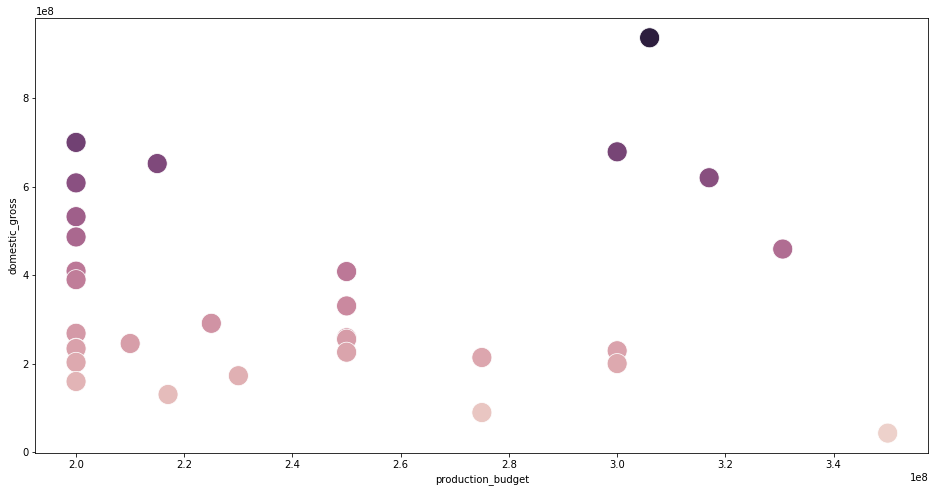

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 8))


sns.scatterplot(x= dfdropped.production_budget, y= dfdropped.domestic_gross, hue= dfdropped.domestic_gross, data= dfdropped, ci = None, s= 400, legend = None)



In [12]:
df.loc[(df!=0).any(axis=1)]


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
...,...,...,...,...,...,...
5756,57,2015-04-21,The Front Man,20000,0,0
5761,62,2014-12-31,Stories of Our Lives,15000,0,0
5771,72,2015-05-19,Family Motocross,10000,0,0
5777,78,2018-12-31,Red 11,7000,0,0


AttributeError: 'Rectangle' object has no property 's'

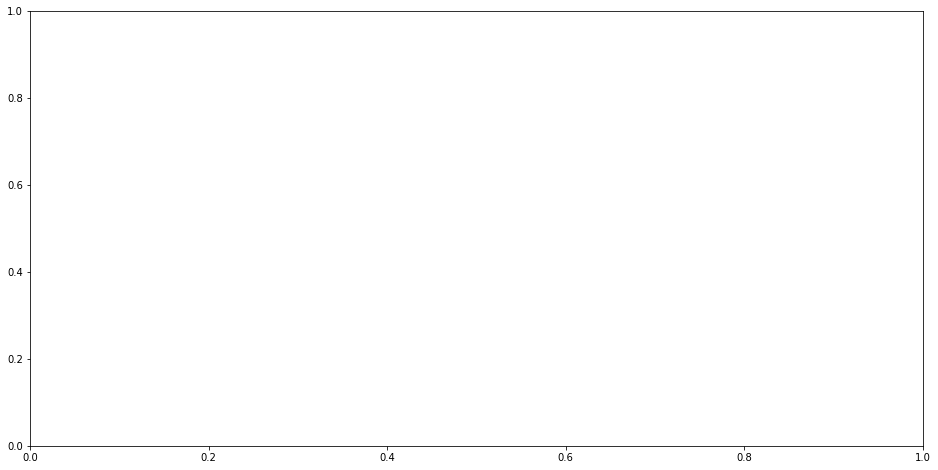

In [13]:
plt.figure(figsize=(16, 8))

sns.barplot(x= dfdropped.production_budget, y= dfdropped.domestic_gross, color = 'rebeccapurple', data= dfdropped, ci = None, s= 400, legend = None)
